In [1]:
import pandas as pd

raw_file = "dataset/raw.csv"
raw_df = pd.read_csv(raw_file)
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


[Text(0, 0, 'sincere'), Text(1, 0, 'insincere')]

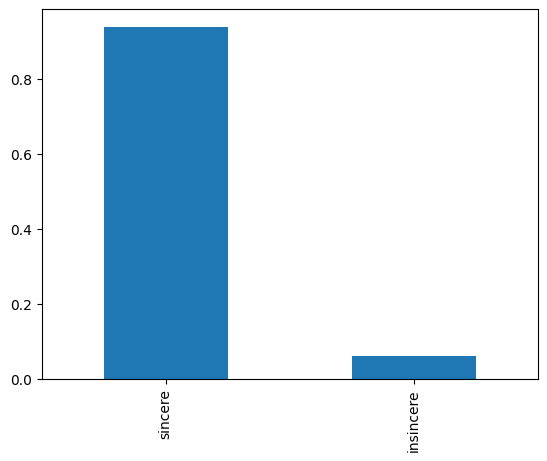

In [2]:
import matplotlib.pyplot as plt

raw_plot = raw_df.target.value_counts(normalize=True).plot(kind='bar')
raw_plot.set_xticklabels(["sincere", "insincere"])

In [3]:
from resampling import resampling_data
fix_df = resampling_data(raw_df)
fix_df

,qid,question_text,target
0,82b74bb7c679ffcf62bd,How can I stop liking and thinking about the s...,0
1,4823e179abaa656b92e7,Is Shimla worth visiting?,0
2,f4bb277237ea078e36d7,Have you ever taught a bearded dragon to wear ...,0
3,c7c3a79f2ce961e9a423,Why can you see craters on the moon but you ca...,0
4,0db812cbac931b2a6616,What are the best ways to start gravel biking ...,0
...,...,...,...
3995,10dca9f75ae50565573a,I guess liberals upset that Supreme Court rule...,1
3996,a1e47a769b30c056007d,Why do religious people who have no problem wi...,1
3997,02b80be7caaba801d5c9,Should Donald Trump have sent planes or ships ...,1
3998,53bb809c29913376eb99,Coal is a renewable resource. Why do liberals ...,1


In [4]:
from preprocessing import preprocessing_text
fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text)
# fix_df.to_csv('preprocessed_data.csv', index=False)

[nltk_data] Downloading package wordnet to C:\Users\Rizha
[nltk_data]     Alfianita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from sklearn.model_selection import train_test_split

X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2800,)
(1200,)
(2800,)
(1200,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# print TF-IDF result
# tfidf.get_feature_names_out()[:100]
print("X Train : \n", X_train_tfidf.toarray())
print("\n")
print("X Test : \n", X_test_tfidf.toarray())

X Train : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


X Test : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from MultinomialNB import MultinomialNaiveBayes
mnb = MultinomialNaiveBayes(alpha=1)
mnb.fit(X_train_tfidf.toarray(), y_train)
y_pred = mnb.predict(X_test_tfidf.toarray())

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Sincere', 'Insincere']))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[427 195]
 [ 37 541]]

Classification Report:
              precision    recall  f1-score   support

     Sincere       0.92      0.69      0.79       622
   Insincere       0.74      0.94      0.82       578

    accuracy                           0.81      1200
   macro avg       0.83      0.81      0.80      1200
weighted avg       0.83      0.81      0.80      1200


Accuracy: 0.81


In [9]:
# import tkinter as tk
# from tkinter import ttk

# def predict():
#     entered_text = entry.get()

# # Create the main window
# root = tk.Tk()
# root.title("Text Classification Predictor")

# # Create and place widgets in the window
# label = ttk.Label(root, text="Enter Text:")
# label.grid(row=0, column=0, padx=10, pady=10)

# entry = ttk.Entry(root, width=40)
# entry.grid(row=0, column=1, padx=10, pady=10)

# predict_button = ttk.Button(root, text="Predict", command=predict)
# predict_button.grid(row=1, column=0, columnspan=2, pady=10)

# root.mainloop()